# Lead Scoring Study 

## A. Problem Statment 

1. Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads
2. Creating a model that can adjust according to company's requirements
    - When sales team is recruited and the team wants to contact all the leads that has good chances of conversion
    - When the sales team is involved in other project and will only call when there is a requirement 

#### Importing Revelant Libraries

In [312]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [313]:
df = pd.read_csv('Leads.csv')

In [314]:
# checking the shape of dataframe 

df.shape

(9240, 37)

In [315]:
# observing the dataframe for the first time

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## B. Data Preperation and EDA

In [316]:
# checking for columns with 'select' field
# select is an option that was not selected during data entry

df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [317]:
# replacing 'Select' by nan in 'Specialization'

df['Specialization'] = df['Specialization'].replace('Select',np.nan)

In [318]:
# replacing 'Select' by nan in 'How did you hear about X Education'

df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)

In [319]:
# replacing 'Select' by nan in 'Lead Profile'

df['Lead Profile'] = df['Lead Profile'].replace('Select',np.nan)

In [320]:
#replacing 'Select' by nan in 'City'

df['City'] = df['City'].replace('Select',np.nan)

In [321]:
# checking the percentage of missing values 

round(df.isnull().sum()/len(df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Dropping rows with missing high percentage of missing values

- 'Lead Quality' is a metric based on the intution of the employee who has been assigned the lead. With high missing values it does not hold significance to the model we will create

In [322]:
# droppping 'Lead Quality'

df.drop('Lead Quality' , axis =1 , inplace = True)

#### Note

The following are metrics assigned to each customer based on their activity and profile. It does not hold high significance to understand their state with hot leads specially when they have high missing values
1. 'Asymmetrique Activity Index'
2. 'Asymmetrique Profile Index'
3. 'Asymmetrique Activity Score'
4. 'Asymmetrique Profile Score'

In [323]:
# dropping the above mentioned rows 

df.drop('Asymmetrique Activity Index' , axis =1 , inplace = True)

df.drop('Asymmetrique Profile Index' , axis =1 , inplace = True)

df.drop('Asymmetrique Activity Score' , axis =1 , inplace = True)

df.drop('Asymmetrique Profile Score' , axis =1 , inplace = True)

#### Note

- 'Country' has significant number of missing values and is not a important variable for the problem statement we have

In [324]:
# dropping 'Country'

df.drop('Country' , axis =1 , inplace = True)

In [325]:
# checking the percentage of missing values 

round(df.isnull().sum()/len(df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [326]:
df.shape

(9240, 31)

#### Note

- 'What is your current occupation' , 'What matters most to you in choosing a course' and 'Tags' have might high number of missing values but they have important information for the problem statement. Doing some analysis on the same

In [327]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Note

- The majority of information in 'What is your current occupation' does not have enough significance in the categorisation of hot leads. Between unemployed, workig professional and student it has most of the information. With high missing values this column is not significant enough. Thus dropping 'What is your current occupation'

In [328]:
# dropping 'What is your current occupation'

df.drop('What is your current occupation' , axis =1 , inplace = True)

In [329]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### Note

- 'What matters most to you in choosing a course' has most of its information as Better Career Prospects. Thus if we drop the column it will not make a lot of difference to the model

In [330]:
# dropping 'What matters most to you in choosing a course'

df.drop('What matters most to you in choosing a course' , axis =1 , inplace = True)

In [331]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

#### Note

- The information with large values in 'Tags' such as -Will revert after reading the email- have less significance in making with regards to our problem statement. We can drop this column 

In [332]:
# dropping 'Tags'

df.drop('Tags' , axis =1 , inplace = True)

In [333]:
# checking the missing values now 

round(df.isnull().sum()/len(df.index),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.01
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.01
Last Activity                               0.01
Specialization                              0.37
How did you hear about X Education          0.78
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

#### Note

- We do not have significant missing values in the dataframe now. We can proceed to the next step. 

In [334]:
df.shape

(9240, 28)

#### Finding highly skewed columns

- Skewed columns are columns that have categorical values but are highly polarised in terms of their data

In [335]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [336]:
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [337]:
# dropping 'Do Not Call'

df.drop('Do Not Call', axis =1 , inplace = True)

In [338]:
df['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [339]:
# dropping 'Magazine'

df.drop('Magazine', axis=1 , inplace = True)

In [340]:
df['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [341]:
# dropping 'Search'

df.drop('Search' , axis =1, inplace =True)

In [342]:
df['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [343]:
# dropping 'Newspaper Article'

df.drop('Newspaper Article', axis =1 , inplace = True)

In [344]:
df['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [345]:
# dropping 'X Education Forums'

df.drop('X Education Forums', axis =1 , inplace = True)

In [346]:
df['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [347]:
# dropping 'Newspaper'

df.drop('Newspaper', axis=1 , inplace = True)

In [348]:
df['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [349]:
# dropping 'Digital Advertisement'

df.drop('Digital Advertisement', axis=1 , inplace = True)

In [350]:
df['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [351]:
# dropping 'Through Recommendations'

df.drop('Through Recommendations', axis=1 , inplace = True)

In [352]:
df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [353]:
# dropping 'Receive More Updates About Our Courses'

df.drop('Receive More Updates About Our Courses', axis=1 , inplace = True)

In [354]:
df['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [355]:
# dropping 'Update me on Supply Chain Content'

df.drop('Update me on Supply Chain Content', axis=1 , inplace = True)

In [356]:
df['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [357]:
# dropping 'Get updates on DM Content'

df.drop('Get updates on DM Content', axis=1 , inplace = True)

In [358]:
df['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [359]:
 # dropping 'I agree to pay the amount through cheque'

df.drop('I agree to pay the amount through cheque', axis=1 , inplace = True)

#### Note

- The other columns do not have skewed values in the dataframe and we can proceed to the next step

#### Checking for categorical columns with less percentage of rows

In [360]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [361]:
df.shape

(9240, 16)

In [362]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [363]:
# putting the values with less than 100 occurences in one category - other

lis_ls = ['Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','blog','Pay per Click Ads','welearnblog_Home','WeLearn','testone','NC_EDM','youtubechannel']

df['Lead Source'] = df['Lead Source'].apply(lambda x : 'Other_ls' if x in lis_ls else x)


In [364]:
df['Lead Source'].value_counts()

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other_ls              83
Name: count, dtype: int64

In [365]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [366]:
# putting the values with less than 100 occurences in one category - other

lis_ed = ['Advertisements','Social Media','Email','SMS']

df['How did you hear about X Education'] = df['How did you hear about X Education'].apply(lambda x : 'Other_ed' if x in lis_ed else x)

In [367]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Other_ed                 186
Multiple Sources         152
Name: count, dtype: int64

In [368]:
df['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [369]:
lis_lp = ['Lateral Student','Dual Specialization Student']

df['Lead Profile'] = df['Lead Profile'].apply(lambda x : 'Other_lp' if x in lis_lp else x)

In [370]:
df['Lead Profile'].value_counts()

Lead Profile
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Other_lp                   44
Name: count, dtype: int64

In [371]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [372]:
lis_la = ['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow']

df['Last Activity'] = df['Last Activity'].apply(lambda x : 'Other_la' if x in lis_la else x)

In [373]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other_la                      205
Form Submitted on Website     116
Name: count, dtype: int64

In [374]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [375]:
lis_na = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','Email Received','Form Submitted on Website','View in browser link Clicked','Approached upfront']

df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x : 'Other_na' if x in lis_na else x)

In [376]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_na                    160
Name: count, dtype: int64

In [377]:
round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.01
Total Time Spent on Website               0.00
Page Views Per Visit                      0.01
Last Activity                             0.01
Specialization                            0.37
How did you hear about X Education        0.78
Lead Profile                              0.74
City                                      0.40
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Removing any remaining null values

In [378]:
round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.01
Total Time Spent on Website               0.00
Page Views Per Visit                      0.01
Last Activity                             0.01
Specialization                            0.37
How did you hear about X Education        0.78
Lead Profile                              0.74
City                                      0.40
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [379]:
df.shape

(9240, 16)

In [380]:
# dropping the null values in the remaiaining columns as their number is very small 

df.dropna(inplace = True)

In [381]:
# checking for the null variables 

round(df.isnull().sum()/len(df.index),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [382]:
df.shape

(519, 16)

In [383]:
#### Checking the percentage of the rows that are left

a = len(df.index)/9240
print(a)

0.05616883116883117


In [384]:
# We have retainied more than 98 percentage of the rows after removing the null values 

#### Creating Dummies for all the categorical variables 

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 6 to 9231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             519 non-null    object 
 1   Lead Number                             519 non-null    int64  
 2   Lead Origin                             519 non-null    object 
 3   Lead Source                             519 non-null    object 
 4   Do Not Email                            519 non-null    object 
 5   Converted                               519 non-null    int64  
 6   TotalVisits                             519 non-null    float64
 7   Total Time Spent on Website             519 non-null    int64  
 8   Page Views Per Visit                    519 non-null    float64
 9   Last Activity                           519 non-null    object 
 10  Specialization                          519 non-null    object 
 1

#### Variable One : Lead Origin

In [386]:
leadorigin_dummy = pd.get_dummies(df['Lead Origin'], drop_first = True, dtype = int)
leadorigin_dummy.head()

,Landing Page Submission,Lead Add Form
6,1,0
22,1,0
27,1,0
37,1,0
39,1,0


#### Variable Two : Lead Source

In [387]:
leadsource_dummy = pd.get_dummies(df['Lead Source'], drop_first = True ,dtype = int)
leadsource_dummy.head()

,Google,Olark Chat,Organic Search,Other_ls,Reference,Referral Sites
6,1,0,0,0,0,0
22,1,0,0,0,0,0
27,1,0,0,0,0,0
37,1,0,0,0,0,0
39,1,0,0,0,0,0


#### Variable Three : Do Not Email

In [388]:
# creating a function to clearly mention the yes and its related variable

def email(x):
    if x == 'Yes':
        return 'yes_email'
    else:
        return 'no_email'

In [389]:

df['Do Not Email'] = df['Do Not Email'].apply(email)

In [390]:
donotemail_dummy = pd.get_dummies(df['Do Not Email'], drop_first = True,dtype = int)
donotemail_dummy.head()

,yes_email
6,0
22,0
27,0
37,0
39,0


#### Variable Four : Last Activity 

In [391]:
def sms(x):
    if x == 'SMS Sent':
        return 'sms_sent_la'
    if x == 'Olark Chat Conversation':
        return 'Olark_Chat_Conversation_la'
    else:
        return x

In [392]:
df['Last Activity'] = df['Last Activity'].apply(sms)

In [393]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                  263
sms_sent_la                   126
Page Visited on Website        44
Converted to Lead              21
Form Submitted on Website      20
Other_la                       14
Email Link Clicked             14
Olark_Chat_Conversation_la     12
Email Bounced                   5
Name: count, dtype: int64

In [394]:
lastactivity_dummy = pd.get_dummies(df['Last Activity'], drop_first = True,dtype = int)
lastactivity_dummy.head()

,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark_Chat_Conversation_la,Other_la,Page Visited on Website,sms_sent_la
6,0,0,1,0,0,0,0,0
22,0,0,0,0,0,0,0,0
27,0,0,1,0,0,0,0,0
37,0,0,1,0,0,0,0,0
39,0,0,1,0,0,0,0,0


#### Variable Five : Specialization 

In [395]:
df['Specialization'].value_counts()

Specialization
Finance Management                   96
Human Resource Management            77
Marketing Management                 77
Business Administration              51
Banking, Investment And Insurance    40
Operations Management                36
IT Projects Management               32
Supply Chain Management              29
Media and Advertising                18
International Business               16
Retail Management                    14
Travel and Tourism                    9
E-Business                            8
Hospitality Management                7
Healthcare Management                 3
E-COMMERCE                            3
Rural and Agribusiness                3
Name: count, dtype: int64

In [396]:
def specs(x):
    if x == 'Select':
        return 'select_specs'
    else:
        return x

In [397]:
df['Specialization'] = df['Specialization'].apply(specs)

In [398]:
specialization_dummy = pd.get_dummies(df['Specialization'], drop_first = True,dtype = int)
specialization_dummy.head()

,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Supply Chain Management,Travel and Tourism
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Variable Six : How did you hear about X Education

In [399]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            217
Student of SomeSchool     93
Word Of Mouth             87
Other_ed                  46
Other                     45
Multiple Sources          31
Name: count, dtype: int64

In [400]:
def edu (x):
    if x == 'Student of SomeSchool':
        return 'edu_someschool'
    else:
        return x

In [401]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].apply(edu)

In [402]:
education_dummy = pd.get_dummies(df['How did you hear about X Education'], drop_first = True,dtype = int)
education_dummy.head()

,Online Search,Other,Other_ed,Word Of Mouth,edu_someschool
6,1,0,0,0,0
22,0,0,1,0,0
27,1,0,0,0,0
37,0,0,0,0,1
39,0,0,1,0,0


#### Variable Seven : Lead Profile

In [403]:
df['Lead Profile'].value_counts()

Lead Profile
Potential Lead           372
Other Leads              130
Student of SomeSchool     11
Other_lp                   6
Name: count, dtype: int64

In [404]:
def lp(x):
    if x == 'Select':
        return 'select_lp'
    elif x == 'Student of SomeSchool':
        return 'lp_someschool'
    else:
        return x

In [405]:
df['Lead Profile'] = df['Lead Profile'].apply(lp)

In [406]:
leadprofile_dummy = pd.get_dummies(df['Lead Profile'], drop_first = True,dtype = int)
leadprofile_dummy.head()

,Other_lp,Potential Lead,lp_someschool
6,0,1,0
22,0,1,0
27,0,1,0
37,0,1,0
39,0,1,0


#### Variable Eight : City 

In [407]:
df['City'].value_counts()

City
Mumbai                         318
Thane & Outskirts               96
Other Cities                    42
Other Cities of Maharashtra     41
Other Metro Cities              19
Tier II Cities                   3
Name: count, dtype: int64

In [408]:
def city (x):
    if  x == 'Select':
        return 'select_city'
    else:
        return x

In [409]:
df['City'] = df['City'].apply(city)

In [410]:
city_dummy = pd.get_dummies(df['City'], drop_first = True,dtype = int)
city_dummy.head()

,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
6,0,0,0,0,0
22,0,0,0,0,0
27,0,0,0,0,0
37,0,0,0,0,0
39,0,1,0,0,0


#### Variable Nine : A free copy of Mastering The Interview

In [411]:
df['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     479
Yes     40
Name: count, dtype: int64

In [412]:
# creating a function to clearly mention the yes and its related variable

def emails(x):
    if x == 'Yes':
        return 'yes_copy'
    else:
        return 'no_copy'

In [413]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(emails)

In [414]:
copy_dummy = pd.get_dummies(df['A free copy of Mastering The Interview'], drop_first = True,dtype = int)
copy_dummy.head()

,yes_copy
6,0
22,0
27,0
37,0
39,0


#### Variable Ten : Last Notable Activity

In [415]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Email Opened               227
Modified                   148
SMS Sent                   104
Page Visited on Website     20
Other_na                    12
Email Link Clicked           6
Olark Chat Conversation      2
Name: count, dtype: int64

In [416]:
activity_dummy = pd.get_dummies(df['Last Notable Activity'], drop_first = True,dtype = int)
activity_dummy.head()

,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
6,0,1,0,0,0,0
22,0,1,0,0,0,0
27,1,0,0,0,0,0
37,1,0,0,0,0,0
39,1,0,0,0,0,0


In [417]:
#### Putting all the dummy dataframe together 

final = pd.concat([df,leadorigin_dummy,leadsource_dummy,donotemail_dummy,lastactivity_dummy,specialization_dummy,education_dummy,leadprofile_dummy,city_dummy,copy_dummy,activity_dummy],axis =1)
final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Other Metro Cities,Thane & Outskirts,Tier II Cities,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,no_email,1,2.0,1640,2.0,Email Opened,...,0,0,0,0,0,1,0,0,0,0
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,Landing Page Submission,Google,no_email,1,1.0,1013,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0
27,6d143c0e-abae-425f-a2c0-52c2946cbd45,660424,Landing Page Submission,Google,no_email,1,6.0,1315,6.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
37,e60a54bc-0816-430e-a99a-019a8b5a27e5,660267,Landing Page Submission,Google,no_email,1,5.0,563,5.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
39,d6686032-c65e-4495-a0f4-ba7471209356,660236,Landing Page Submission,Google,no_email,1,4.0,25,4.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0


In [418]:
# dropping all the related variables after creating the dummies 

final = final.drop('Lead Origin',axis =1)
final = final.drop('Lead Source',axis =1)
final = final.drop('Do Not Email',axis =1)
final = final.drop('Last Activity',axis =1)
final = final.drop('Specialization',axis =1)
final = final.drop('How did you hear about X Education',axis =1)
final = final.drop('Lead Profile',axis =1)
final = final.drop('City',axis =1)
final = final.drop('A free copy of Mastering The Interview',axis =1)
final = final.drop('Last Notable Activity',axis =1)

In [419]:
final.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Google,Olark Chat,...,Other Metro Cities,Thane & Outskirts,Tier II Cities,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,2.0,1640,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,1,1.0,1013,1.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27,6d143c0e-abae-425f-a2c0-52c2946cbd45,660424,1,6.0,1315,6.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
37,e60a54bc-0816-430e-a99a-019a8b5a27e5,660267,1,5.0,563,5.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
39,d6686032-c65e-4495-a0f4-ba7471209356,660236,1,4.0,25,4.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## C. Dividing into train test data

In [420]:
# importing relevant libraries 

import sklearn
from sklearn.model_selection import train_test_split

In [421]:
final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(363, 59)
(156, 59)


## D. Performing scaling on continuous variables 

In [422]:
# we are using the min max scaler for rescaling 

In [423]:
#importing relevant packages 

from sklearn.preprocessing import MinMaxScaler

In [424]:
# Instiating scaler object 

scaler = MinMaxScaler()

In [425]:
# creating a list of numeric variables 

numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [426]:
final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [427]:
final_train.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Google,Olark Chat,...,Other Metro Cities,Thane & Outskirts,Tier II Cities,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
9210,14ac6418-af18-4acd-b464-02f6e0fefa1c,579833,1,0.071429,0.471756,0.230769,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4106,3c3eba72-cda4-4519-8d79-ee33f99d66b0,620588,0,0.023810,0.234606,0.076923,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2851,988470a6-9910-4a4a-b4b7-f3fefe09e6e1,632338,1,0.047619,0.405598,0.153846,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4291,1930406c-7458-45b0-8a22-904cac7f37a3,618747,1,0.095238,0.572519,0.307692,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2303,be8bc9ee-a912-4b2c-be12-f4983bba4c38,637416,0,0.023810,0.789822,0.076923,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## E. Creating the test train split 

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
x = final.drop(['Prospect ID','Lead Number','Converted'], axis =1)

In [430]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Google,Olark Chat,Organic Search,Other_ls,Reference,...,Other Metro Cities,Thane & Outskirts,Tier II Cities,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
6,2.0,1640,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,1.0,1013,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
27,6.0,1315,6.0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37,5.0,563,5.0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,4.0,25,4.0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [431]:
y = final['Converted']

In [432]:
y.head()

6     1
22    1
27    1
37    1
39    1
Name: Converted, dtype: int64

In [433]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [434]:
# calculating the conversion rate

conversion = sum(final['Converted'])/len(final['Converted'].index)
conversion

0.6840077071290944

- We have a converstion rate of 37.86 percentage 

## F. Building the first model

In [435]:
import statsmodels.api as sm

In [436]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  363
Model:                            GLM   Df Residuals:                      307
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.29
Date:                Tue, 25 Jun 2024   Deviance:                       212.57
Time:                        05:57:18   Pearson chi2:                     230.
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5045
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.1862      3.095     -1.676      0.094     -11.252       0.879
TotalVisits                     0.0464      0.056      0.832      0.405      -0.063       0.156
Total Time Spent on Website     0.0034      0.000      7.380      0.000       0.003       0.004
Page Views Per Visit           -0.0293      0.141     -0.209      0.835      -0.305       0.246
Landing Page Submission        -1.5632      1.001     -1.561      0.118      -3.526       0.399
Lead Add Form                  11.3515   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Google                          1.2743      0.588      2.167      0.030       0.122       2.427
Olark Chat                     -3.5151      2.285     -1.538      0.124      -7.994       0.964
Organic Search                 -1.0341      1.044     -0.990      0.322      -3.080       1.012
Other_ls                      -22.3939   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Reference                      11.3515   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Referral Sites                 22.4613   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
yes_email                     -25.7688   3.45e+04     -0.001      0.999   -6.76e+04    6.75e+04
Email Bounced                  19.5349   2.71e+04      0.001      0.999   -5.31e+04    5.31e+04
Email Link Clicked              1.7353      1.480      1.173      0.241      -1.165       4.635
Email Opened                    0.8030      1.235      0.650      0.516      -1.618       3.224
Form Submitted on Website      -0.4303      1.577     -0.273      0.785      -3.521       2.660
Olark_Chat_Conversation_la     -0.8226      1.597     -0.515      0.607      -3.953       2.308
Other_la                       25.5054    8.3e+04      0.000      1.000   -1.63e+05    1.63e+05
Page Visited on Website         1.2352      1.349      0.915      0.360      -1.410       3.880
sms_sent_la                     1.9433      1.357      1.432      0.152      -0.717       4.603
Business Administration        -1.3561      0.851     -1.594      0.111      -3.024       0.312
E-Business                     -0.2822      2.677     -0.105      0.916      -5.530       4.965
E-COMMERCE                     21.4878    8.9e+04      0.000      1.000   -1.74e+05    1.74e+05
Finance Management             -0.4597      0.782     -0.588      0.557      -1.993       1.073
Healthcare Management          21.8921   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Hospitality Management         -0.3384      1.446     -0.234      0.815      -3.172       2.495
Human Resource Management      -0.9940      0.815     -1.219      0.223      -2.592       0.604
IT Projects Management         -0.1936      1.038     -0.186      0.852      -2.229       1.842
Internation

## G. Selecting the Variables with RFE

In [437]:
# importing relevant libraries 

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [438]:
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

In [439]:
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 47),
 ('Page Views Per Visit', False, 33),
 ('Landing Page Submission', False, 2),
 ('Lead Add Form', False, 31),
 ('Google', True, 1),
 ('Olark Chat', False, 23),
 ('Organic Search', False, 3),
 ('Other_ls', False, 35),
 ('Reference', False, 30),
 ('Referral Sites', False, 18),
 ('yes_email', False, 5),
 ('Email Bounced', False, 19),
 ('Email Link Clicked', False, 12),
 ('Email Opened', False, 13),
 ('Form Submitted on Website', True, 1),
 ('Olark_Chat_Conversation_la', False, 21),
 ('Other_la', False, 10),
 ('Page Visited on Website', False, 14),
 ('sms_sent_la', False, 11),
 ('Business Administration', False, 16),
 ('E-Business', False, 26),
 ('E-COMMERCE', False, 8),
 ('Finance Management', False, 17),
 ('Healthcare Management', False, 29),
 ('Hospitality Management', False, 7),
 ('Human Resource Management', False, 15),
 ('IT Projects Management', False, 37),
 ('International Business', False, 45),
 ('Marketing M

In [440]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [441]:
x_train[col].head()

,Google,Form Submitted on Website,Retail Management,Supply Chain Management,Travel and Tourism,Other_lp,Potential Lead,lp_someschool,Other Metro Cities,Modified
9210,0,0,0,0,0,0,1,0,0,1
4106,1,1,0,0,0,0,0,0,0,1
2851,1,0,0,0,0,0,1,0,0,1
4291,1,0,0,0,0,0,1,0,0,0
2303,1,0,0,0,0,0,0,0,0,1


In [442]:
# chekcking the selected columns 

x_train.columns[rfe.support_]

Index(['Google', 'Form Submitted on Website', 'Retail Management',
       'Supply Chain Management', 'Travel and Tourism', 'Other_lp',
       'Potential Lead', 'lp_someschool', 'Other Metro Cities', 'Modified'],
      dtype='object')

## H. Building the Model Based on the selected variables 

In [443]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
model_one.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  363
Model:                            GLM   Df Residuals:                      352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.33
Date:                Tue, 25 Jun 2024   Deviance:                       336.65
Time:                        05:57:18   Pearson chi2:                     318.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3026
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4404      0.377     -3.823      0.000      -2.179      -0.702
Google                        1.1551      0.331      3.490      0.000       0.506       1.804
Form Submitted on Website    -1.5192      0.875     -1.737      0.082      -3.234       0.195
Retail Management            -1.4114      0.703     -2.007      0.045      -2.790      -0.033
Supply Chain Management       2.2897      1.112      2.058      0.040       0.110       4.470
Travel and Tourism           23.4895   3.02e+04      0.001      0.999   -5.91e+04    5.91e+04
Other_lp                     23.7966   3.34e+04      0.001      0.999   -6.55e+04    6.56e+04
Potential Lead                2.0596      0.294      7.015      0.000       1.484       2.635
lp_someschool               -23.5733   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
Other Metro Cities           22.8614   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Modified                     -0.8518      0.307     -2.771      0.006      -1.454      -0.249
=============================================================================================
"""

In [444]:
# importing relevant libraries 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [445]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
0,Google,2.71
6,Potential Lead,2.45
9,Modified,1.45
1,Form Submitted on Website,1.14
7,lp_someschool,1.07
3,Supply Chain Management,1.06
5,Other_lp,1.05
8,Other Metro Cities,1.05
2,Retail Management,1.04
4,Travel and Tourism,1.01


In [446]:
# 'other_lp' has a very low significance based on the p-value

In [447]:
new = x_train[col]

In [448]:
new.drop('Other_lp', axis = 1, inplace = True)

In [449]:
# creating the model after dropping 'Other_lp'

x_train_sm = sm.add_constant(new)
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  363
Model:                            GLM   Df Residuals:                      353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.11
Date:                Tue, 25 Jun 2024   Deviance:                       344.22
Time:                        05:57:18   Pearson chi2:                     322.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2879
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.3435      0.370     -3.632      0.000      -2.068      -0.618
Google                        1.1896      0.329      3.621      0.000       0.546       1.833
Form Submitted on Website    -1.5592      0.871     -1.791      0.073      -3.266       0.147
Retail Management            -1.4329      0.699     -2.050      0.040      -2.803      -0.063
Supply Chain Management       2.2140      1.106      2.002      0.045       0.047       4.381
Travel and Tourism           23.4235   3.05e+04      0.001      0.999   -5.97e+04    5.98e+04
Potential Lead                1.9353      0.286      6.769      0.000       1.375       2.496
lp_someschool               -23.6647   2.39e+04     -0.001      0.999   -4.69e+04    4.69e+04
Other Metro Cities           23.1860   1.96e+04      0.001      0.999   -3.84e+04    3.84e+04
Modified                     -0.8366      0.303     -2.761      0.006      -1.431      -0.243
=============================================================================================
"""

In [450]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = new.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(new.values,i) for i in range (new.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
0,Google,2.65
5,Potential Lead,2.40
8,Modified,1.45
1,Form Submitted on Website,1.14
6,lp_someschool,1.07
3,Supply Chain Management,1.06
2,Retail Management,1.04
7,Other Metro Cities,1.03
4,Travel and Tourism,1.01


In [451]:
# Getting the predicted values on the train set

y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

9210    0.439102
4106    0.072450
2851    0.720069
4291    0.855872
2303    0.270819
3330    0.855872
6144    0.270819
3270    0.981933
9121    0.586266
1676    0.720069
dtype: float64

In [452]:
y_train_pred

9210    0.439102
4106    0.072450
2851    0.720069
4291    0.855872
2303    0.270819
          ...   
4253    0.855872
5012    0.461612
1326    1.000000
6589    0.270819
1731    0.643781
Length: 363, dtype: float64

In [453]:
y_train_pred = y_train_pred.values.reshape(-1)

In [454]:
y_train_pred

array([4.39102013e-01, 7.24500570e-02, 7.20068583e-01, 8.55872102e-01,
       2.70818947e-01, 8.55872102e-01, 2.70818947e-01, 9.81933190e-01,
       5.86265987e-01, 7.20068583e-01, 8.55872102e-01, 7.20068583e-01,
       8.55872102e-01, 4.61612312e-01, 8.55872102e-01, 8.55872102e-01,
       8.55872102e-01, 4.61612312e-01, 8.55872102e-01, 7.20068583e-01,
       4.61612312e-01, 5.86166200e-02, 2.06941205e-01, 8.55872102e-01,
       8.55872102e-01, 7.20068583e-01, 8.55872102e-01, 8.55872102e-01,
       8.55872102e-01, 8.55872102e-01, 1.96058517e-11, 9.81933190e-01,
       8.55872102e-01, 1.41366676e-01, 8.55872102e-01, 7.20068583e-01,
       6.43780507e-01, 6.43780507e-01, 1.00000000e+00, 5.86265987e-01,
       1.00000000e+00, 4.39102013e-01, 7.20068583e-01, 8.55872102e-01,
       1.41366676e-01, 2.06941205e-01, 9.59255191e-01, 4.61612312e-01,
       8.55872102e-01, 4.61612312e-01, 8.55872102e-01, 4.61612312e-01,
       1.00000000e+00, 6.43780507e-01, 7.24500570e-02, 8.55872102e-01,
      

In [455]:
# creating the columns 'Convert' and 'Convert_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'Convert' :y_train.values, 'Convert_prob' : y_train_pred })

In [456]:
final['Lead Number']

6       660673
22      660471
27      660424
37      660267
39      660236
         ...  
9222    579764
9224    579753
9227    579728
9230    579701
9231    579697
Name: Lead Number, Length: 519, dtype: int64

In [477]:
# creating a column 'Lead_Number' for the datframe y_train_final

y_train_final['Lead Number'] = final['Lead Number']

In [474]:
y_train_final.reset_index(drop=True, inplace=True)
final.reset_index(drop=True, inplace=True)

In [479]:
y_train_final.head()

,Convert,Convert_prob,predicted,score,Lead Number
0,1,0.439102,0,44.0,660673
1,0,0.072450,0,7.0,660471
2,1,0.720069,1,72.0,660424
3,1,0.855872,1,86.0,660267
4,0,0.270819,0,27.0,660236


In [460]:
# creating a column predicted with the cutoff at 0.5

y_train_final['predicted'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [461]:
y_train_final.head()

,Convert,Convert_prob,predicted
0,1,0.439102,0
1,0,0.072450,0
2,1,0.720069,1
3,1,0.855872,1
4,0,0.270819,0


In [462]:
# calculating the score and storing the information in the column 'score'

y_train_final['score'] = round(y_train_final['Convert_prob']*100,0)

In [463]:
y_train_final.head()

,Convert,Convert_prob,predicted,score
0,1,0.439102,0,44.0
1,0,0.072450,0,7.0
2,1,0.720069,1,72.0
3,1,0.855872,1,86.0
4,0,0.270819,0,27.0


## Solution One

- The score in the 'score' column of y_train_final is the value we need as the first part of the solution for the problem

## I. Evaluating the Model

#### Checking the accuracy of the model

In [480]:
# importing relevant libraries 

from sklearn import metrics 

In [481]:
# creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_final.Convert, y_train_final.predicted)
print(confusion)

[[ 79  46]
 [ 41 197]]


In [482]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       3323        582    
# churn            735       1711

In [483]:
print(metrics.accuracy_score(y_train_final.Convert, y_train_final.predicted))

0.7603305785123967


#### Checking the further metrices 

In [484]:
# true positives
tp = confusion[1,1] 

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [485]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 

tp /(tp+fn)

0.8277310924369747

The model has low sensitivity. For our requirement this metric needs to be high. 

In [486]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn /(tn+fp)

0.632

In [487]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp /(tn+fp)

0.368

The model has high specificity 

#### Checking the ROC curve 

In [488]:
# importing relevant libraries 

import matplotlib.pyplot as plt

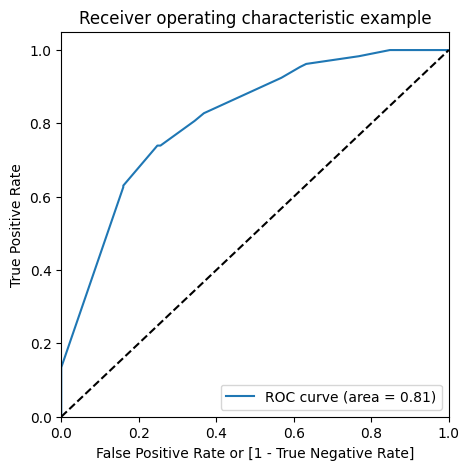

In [489]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.Convert, y_train_final.Convert_prob)

#### Note

- The area under the ROC curve is 0.83 which depicts that the model is a good classifier

In [490]:
# checking different probablity cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.Convert_prob.map(lambda x:1 if x>i else 0)
y_train_final.head()

,Convert,Convert_prob,predicted,score,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.439102,0,44.0,660673,1,1,1,1,1,0,0,0,0,0
1,0,0.072450,0,7.0,660471,1,0,0,0,0,0,0,0,0,0
2,1,0.720069,1,72.0,660424,1,1,1,1,1,1,1,1,0,0
3,1,0.855872,1,86.0,660267,1,1,1,1,1,1,1,1,1,0
4,0,0.270819,0,27.0,660236,1,1,1,0,0,0,0,0,0,0


In [491]:
# creating a dataframe with information about probability, accuracy, sensitivity and specificity 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# tp = confusion[1,1]  true positive 
# tn = confusion[0,0]  true negatives
# fp = confusion[0,1]  false positives
# fn = confusion[1,0]  false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Convert, y_train_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.655647  1.000000  0.000
0.1   0.1  0.699725  1.000000  0.128
0.2   0.2  0.707989  1.000000  0.152
0.3   0.3  0.757576  0.962185  0.368
0.4   0.4  0.757576  0.953782  0.384
0.5   0.5  0.760331  0.827731  0.632
0.6   0.6  0.754821  0.806723  0.656
0.7   0.7  0.741047  0.739496  0.744
0.8   0.8  0.699725  0.626050  0.840
0.9   0.9  0.429752  0.130252  1.000


In [492]:
# If we have to be extremely sure : we can choose 0.2 because sensitivity is 97 percentage and accuracy 53 percentage
# If we have to save time then : we can choose 0.5 because accuracy : 0.79 sensi: 0.70

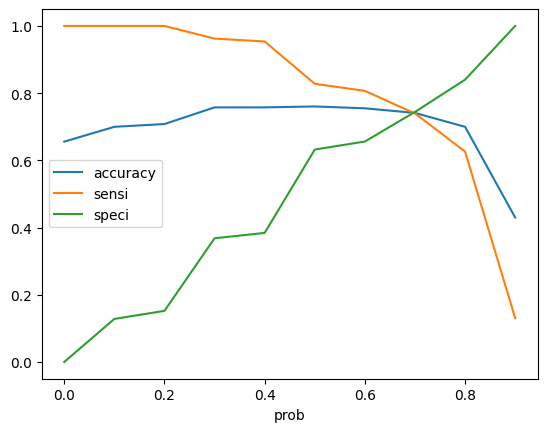

In [493]:
# plotting probability 

cutoff_df.plot.line(x= 'prob', y = ['accuracy','sensi','speci'])
plt.show()

#### Note

- According to the graph the optimal value of cutoff seems to be around 0.3 

## Solution Two

### Case One : When we hire summer interns

In [494]:
y_train_final['predicted_interns'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.2 else 0)

In [495]:
y_train_final['predicted_interns'].value_counts()

predicted_interns
1    344
0     19
Name: count, dtype: int64

In [496]:
# When we hire summer interns we can call 5290 people based on the cutoff of 0.2

#### Financial Note

When we mark the model cutoff at 0.2, the sales team has 83 percent people (from the train set its 5290/6351) to call during this period. The accuracy of the Model is not the greatest. However, we will not miss people who could get converted as the sensitivity of the model at this cutoff is very high.

This allows us to not miss any customer who can get converted. Thus for the company this makes more financial sense during this period as:
1. We are completely focused on sales 
2. We have hired interns to do this job so the cost for result is very low 
3. We will be able to convert more customers hence more revenue 

### Case Two : When we make call with necessary

In [497]:
y_train_final['predicted_necessary'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [498]:
y_train_final['predicted_necessary'].value_counts()

predicted_necessary
1    243
0    120
Name: count, dtype: int64

In [499]:
# When we calling on necessity we call 2293 people based on the cutoff of 0.5

#### Financial Note

When we can mark the model cutoff at 0.5, the sales team has 36 percent people (from the train set its 2293/6351) to call during this period. This percentage is very close to the actual conversion rate which is 37.85 percentage. The accuracy at this cutoff is almost the highest, the sensitivity is close to maximum and we will end up calling the most optimal set of customers. 

This allows us to only focus on the customers that are more likely to convert. Thus for the company this makes more financial sense during period as:
1. We have other things to focus on, so we wont be able to dedicate a lot of resources to calling 
2. We can make optimal use of our human resource as we have lesser customers to target who are more likely to convert
3. The sales team is able to focus on other work of higher importance 

## J. Making Predictions

#### Scaling the continuous features 

In [500]:
# tarnsforming the continuous features in the test dataset 

final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [501]:
final_test.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Google,Olark Chat,...,Other Metro Cities,Thane & Outskirts,Tier II Cities,yes_copy,Email Opened,Modified,Olark Chat Conversation,Other_na,Page Visited on Website,SMS Sent
2109,94b60093-49cd-41f5-be6e-ebc3c009ae54,639376,1,0.076923,0.489894,0.166667,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9138,2e9f60dd-3ed7-48da-b1de-2f8747e026b1,580373,1,0.500000,0.175168,0.150000,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5637,a137659a-3875-4168-9353-2adf499be078,606704,1,0.076923,0.092397,0.166667,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7537,13080004-1399-427b-93c8-c0c26aa3f3f7,591793,1,1.000000,0.162656,0.366667,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4937,413fb82a-0eaa-4e44-a0f1-07276f790d4f,612658,0,0.076923,0.106833,0.166667,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [502]:
# using the features in the test dataframe that were used to create our model 

x_test = x_test[col]

In [503]:
x_test.head()

,Google,Form Submitted on Website,Retail Management,Supply Chain Management,Travel and Tourism,Other_lp,Potential Lead,lp_someschool,Other Metro Cities,Modified
2109,1,0,0,0,0,0,1,0,0,1
9138,1,0,0,0,0,0,1,0,0,1
5637,1,0,0,0,0,0,1,0,0,0
7537,0,0,0,0,0,0,1,0,0,0
4937,1,0,0,0,0,0,0,0,0,0


In [ ]:
# dropping the feature that our model had shown to have very less significance

x_test.drop('Other_lp', axis=1,inplace =True )

In [ ]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [ ]:
# creating the predictions based on the model 

y_test_pred = pred.predict(x_test_sm)
y_test_pred[:10]

In [ ]:
# creating different columns to store the covert situation and the probability for the same

y_test_final = pd.DataFrame({'Convert' : y_test.values, 'Convert_prob' : y_test_pred})

In [ ]:
y_test_final.head()

In [ ]:
# testing with a cutoff at 0.3 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [ ]:
# creating the confusion matrix 

confusion_one = metrics.confusion_matrix(y_test_final.Convert, y_test_final.predicted)
print(confusion_one)

In [ ]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       1487        247    
# churn            322        667

In [ ]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.Convert, y_test_final.predicted))

In [ ]:
# true positives
tp1 = confusion_one[1,1] 

#true negatives
tn1 = confusion_one[0,0]

# false positives
fp1 = confusion_one[0,1]

# false negatives
fn1 = confusion_one[1,0]

In [ ]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp1 /(tp1+fn1)

In [ ]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn1 /(tn1+fp1)

In [ ]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp1 /(tn1+fp1)

#### Note

1. Model works well 
2. The accuracy, sensitivity, specificity are very close to the one generated by the train set on a similar cutoff
3. We can select different cutoff to increase the accuracy, sensitivity and specificity based on the requirement of the case in context